In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [22]:
df = pd.read_csv("../data/processed/MAC000145_preprocessed.csv")


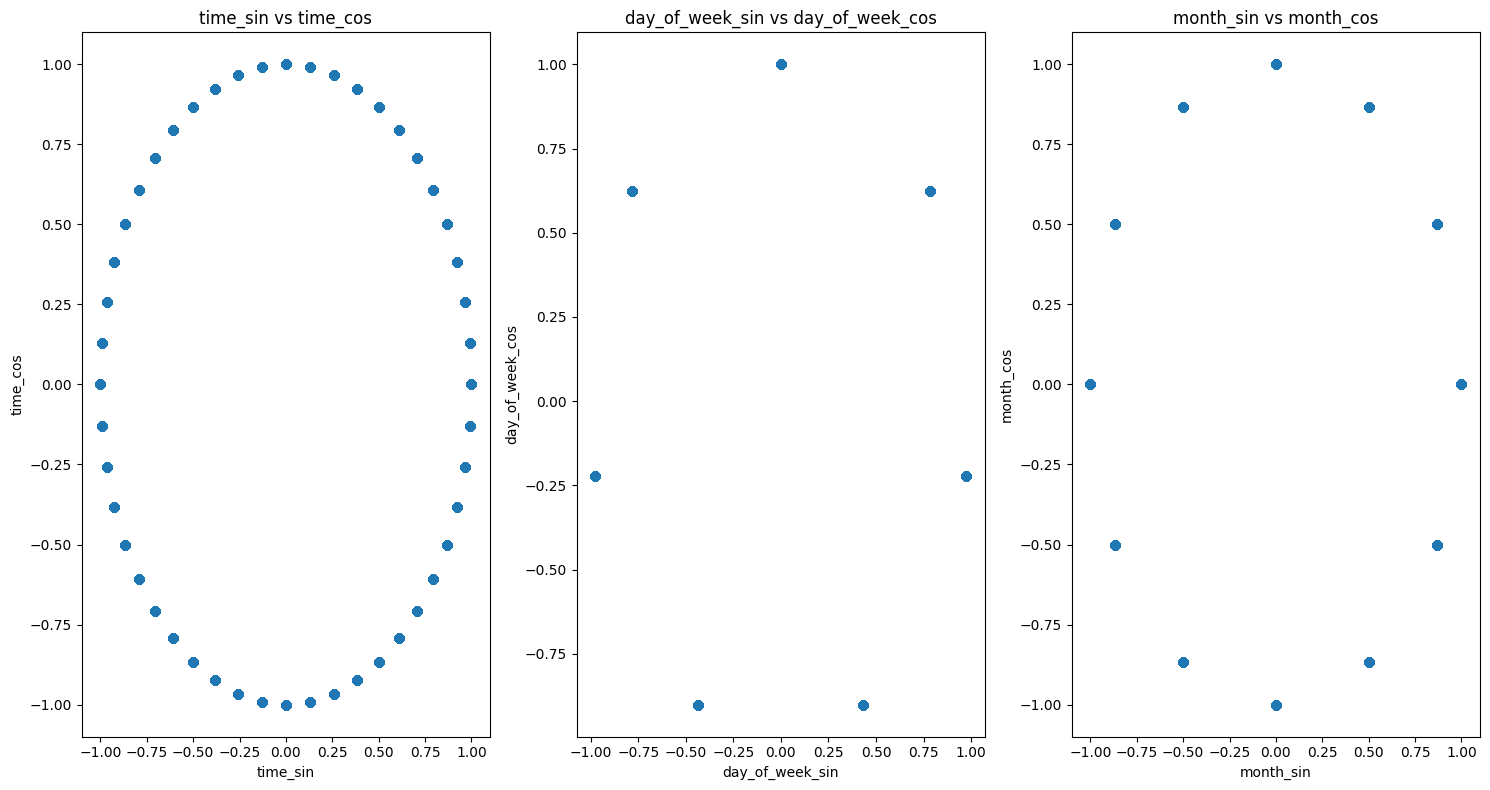

In [23]:
periodic_features = ["time_sin", "time_cos", "day_of_week_sin", "day_of_week_cos", "month_sin", "month_cos"]
if all(feat in df.columns for feat in periodic_features):
    plt.figure(figsize=(15, 8))
    for i, (sin_feat, cos_feat) in enumerate(
        [("time_sin", "time_cos"), ("day_of_week_sin", "day_of_week_cos"), ("month_sin", "month_cos")], 1
    ):
        plt.subplot(1, 3, i)
        plt.scatter(df[sin_feat], df[cos_feat], alpha=0.5)
        plt.xlabel(sin_feat)
        plt.ylabel(cos_feat)
        plt.title(f"{sin_feat} vs {cos_feat}")
    plt.tight_layout()
    plt.show()


In [ ]:
CORRELATION_THRESHOLD = 0.7


def load_and_analyze_features(df):
    print("=== 基本統計量 ===")
    print(df.describe())

    plt.figure(figsize=(15, 12))
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Matrix")
    plt.tight_layout()
    plt.show()

    high_correlation_pairs = []
    high_correlation_pairs.extend(
        (correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j])
        for i in range(len(correlation_matrix.columns))
        for j in range(i)
        if abs(correlation_matrix.iloc[i, j]) > CORRELATION_THRESHOLD
    )

    print(f"\n=== 高相関ペア (|相関係数| > {CORRELATION_THRESHOLD}) ===")
    for pair in high_correlation_pairs:
        print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")

    features = df.columns.drop("KWH/hh")
    n_features = len(features)
    n_cols = 3
    n_rows = (n_features + n_cols - 1) // n_cols

    plt.figure(figsize=(15, 4 * n_rows))
    for i, feature in enumerate(features, 1):
        plt.subplot(n_rows, n_cols, i)
        plt.scatter(df[feature], df["KWH/hh"], alpha=0.5)
        plt.xlabel(feature)
        plt.ylabel("KWH/hh")
        plt.title(f"KWH/hh vs {feature}")
    plt.tight_layout()
    plt.show()


=== 基本統計量 ===
             KWH/hh  cooling_degree  cooling_degree_squared  heating_degree  \
count  39727.000000    39727.000000            39727.000000    39727.000000   
mean       0.261115        0.224583                1.223206        5.741377   
std        0.225533        1.082958                8.133324        4.809257   
min        0.024000        0.000000                0.000000        0.000000   
25%        0.133500        0.000000                0.000000        0.800000   
50%        0.190000        0.000000                0.000000        5.500000   
75%        0.310000        0.000000                0.000000        9.100000   
max        2.854000       13.700000              187.690000       22.800000   

       heating_degree_squared  discomfort_index  sun_duration   cloud_cover  \
count            39727.000000      39727.000000  39727.000000  39727.000000   
mean                56.091787         51.506833      0.160740      0.510246   
std                 69.962953        

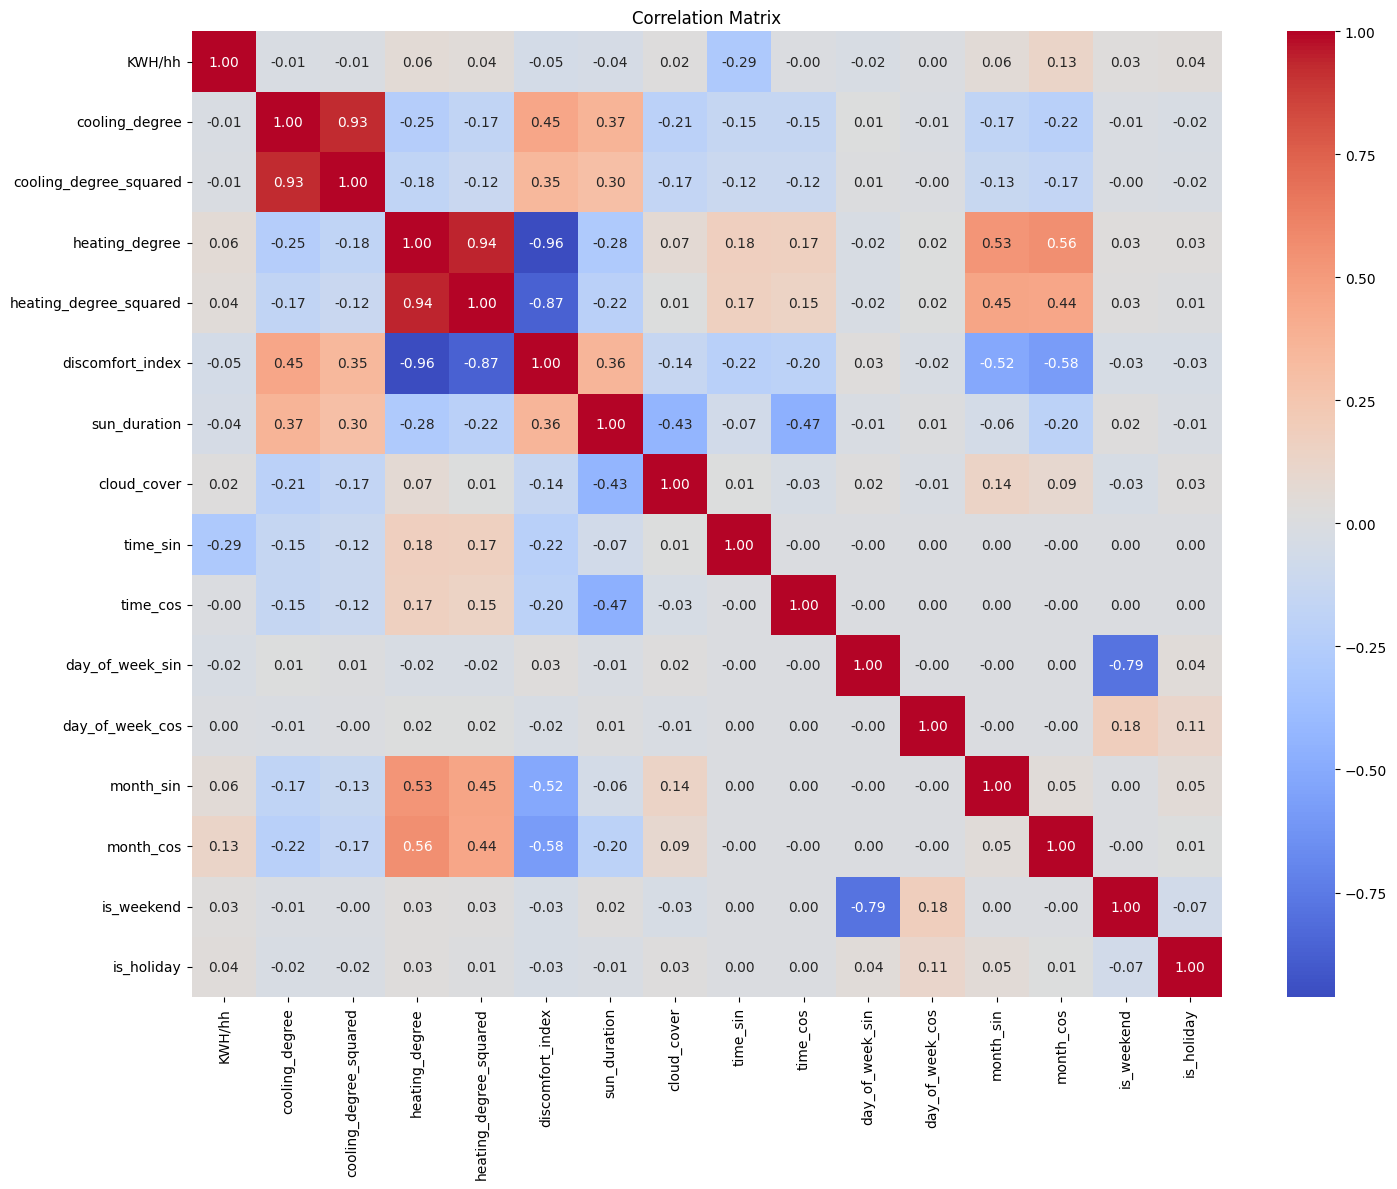


=== 高相関ペア (|相関係数| > 0.7) ===
cooling_degree_squared - cooling_degree: 0.931
heating_degree_squared - heating_degree: 0.940
discomfort_index - heating_degree: -0.963
discomfort_index - heating_degree_squared: -0.870
is_weekend - day_of_week_sin: -0.786


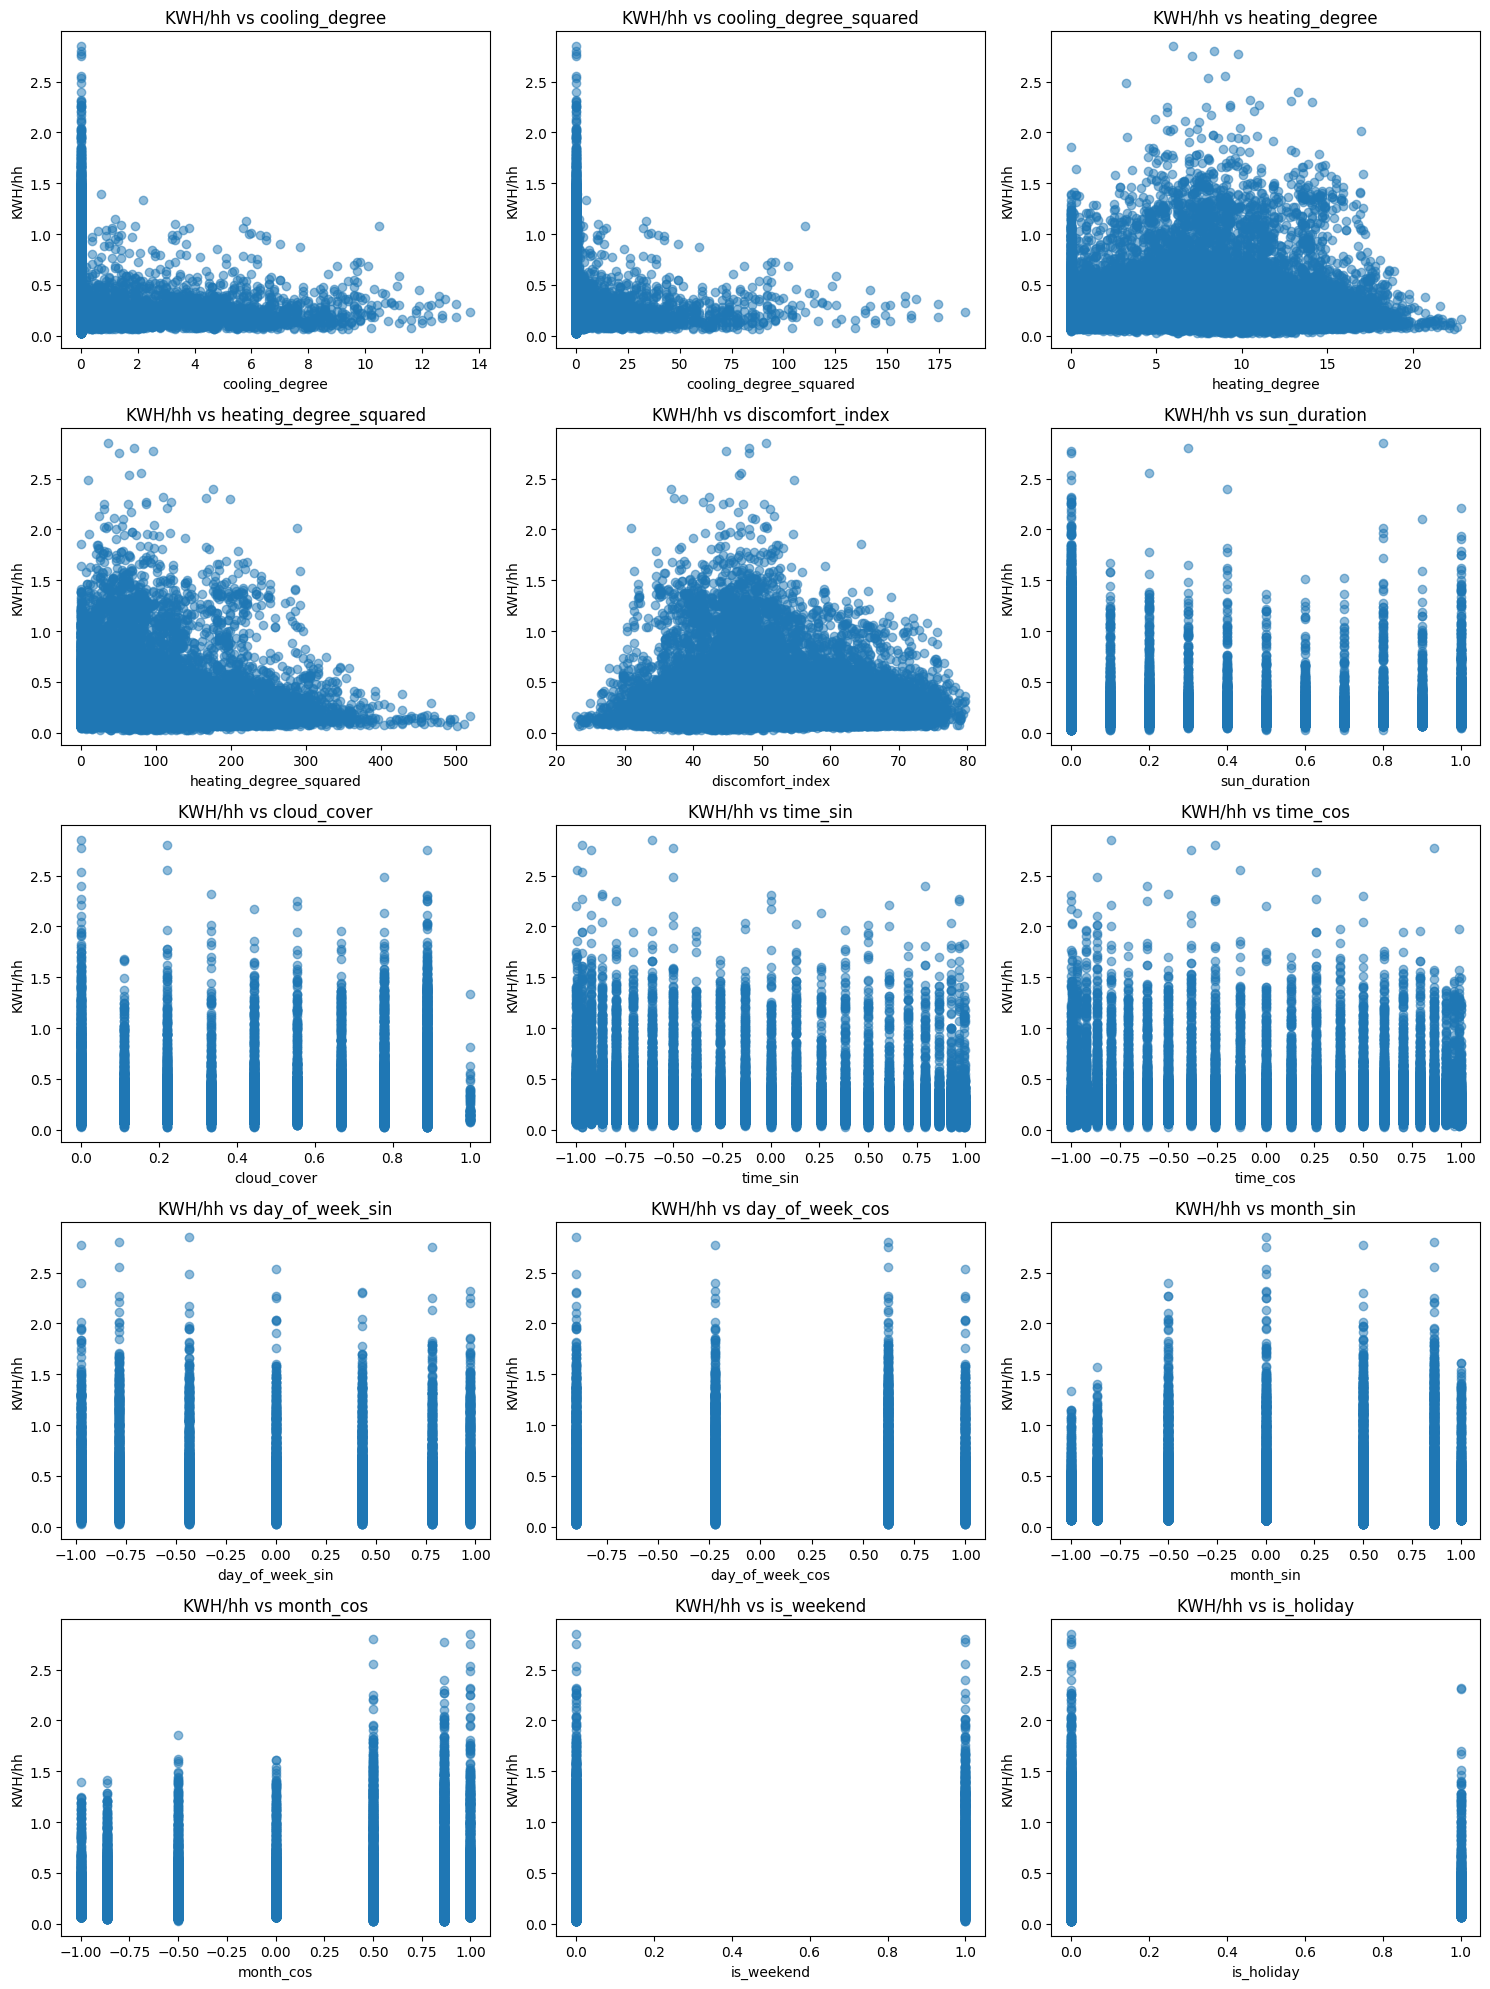

In [25]:
load_and_analyze_features(df)


In [26]:
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data.sort_values("VIF", ascending=False)


print("\n=== VIF (多重共線性の確認) ===")
vif_data = calculate_vif(df.drop("KWH/hh", axis=1))
print(vif_data)



=== VIF (多重共線性の確認) ===


                   Feature        VIF
2           heating_degree  33.421722
3   heating_degree_squared  17.416544
4         discomfort_index  10.153051
0           cooling_degree   9.170220
1   cooling_degree_squared   8.080498
6              cloud_cover   4.106783
13              is_weekend   4.029641
9          day_of_week_sin   2.769156
5             sun_duration   2.529550
12               month_cos   2.201908
11               month_sin   1.976259
8                 time_cos   1.468592
7                 time_sin   1.126585
10         day_of_week_cos   1.113213
14              is_holiday   1.056896
